# Graduação em Matemática Aplicada e Ciência de Dados  
**Álgebra Linear Numérica**  
Bernardo Freitas Paulo da Costa  
Monitora: Beatriz Lúcia Teixeira de Souza  

## Projeto 4  
### Álgebra Linear e Matrizes Aleatórias  
**para 21 de Junho de 2025**  

---


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)
%matplotlib inline

In [3]:
# Gerando matriz aleatória m x n

def matrix(m, n):
    """
    Gera uma matriz aleatória de tamanho m x n.
    """
    return np.random.normal(size=(m, n), loc=0, scale=1)


### Questão 1. Matrizes Gaussianas  
Uma matriz gaussiana tem todas as entradas \( A_{ij} \) independentes e distribuídas segundo uma normal padrão, ou seja, \( A_{ij} \sim \mathcal{N}(0,1) \).  

**a) Distribuição das normas.**  
Faça um histograma da norma-2 das colunas de uma matriz gaussiana \( A_{m \times n} \). Use vários valores de \( m \), e comente o que você observa.  



In [ ]:
sizes = [10, 20, 50, 100, 200, 500, 1000]
for i in sizes:
    norms = []
    m = i
    for k in sizes:
        n = i
        mx = matrix(m, n)
        for j in range (m):
            col = mx[:, j]
            norms.append(np.linalg.norm(col))    
        plt.hist(norms)
        plt.show()



**b) Produtos internos.**  
Fixe $m = 100$ e faça o histograma do produto interno $\langle A_i, A_j \rangle$ entre colunas de uma matriz gaussiana $A$. Exclua os casos $i = j$, e use $n = 100$, 200, 500 e 1000. O que acontece? Qual parece ser a distribuição para $n \to \infty$?  


desvio padrão = 10.094750885546903, erro = 0.09475088554690281
media = 0.014121082661256912, erro = 0.014121082661256912


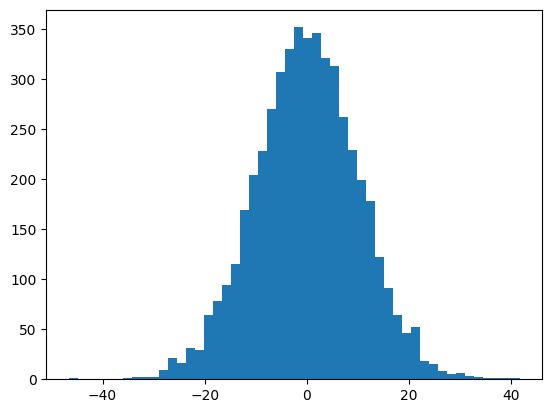

desvio padrão = 9.865848490700085, erro = 0.13415150929991526
media = -0.04848190595335403, erro = 0.04848190595335403


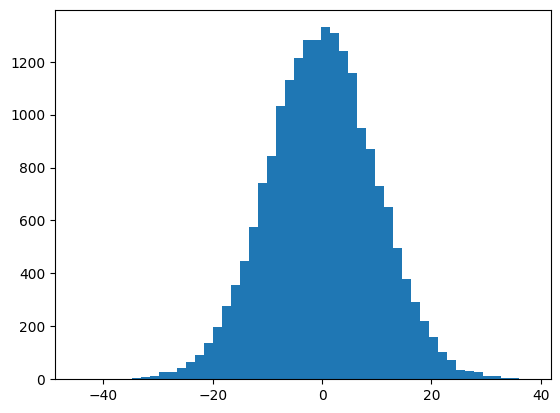

desvio padrão = 9.967053108449182, erro = 0.03294689155081798
media = 0.0014527518806636925, erro = 0.0014527518806636925


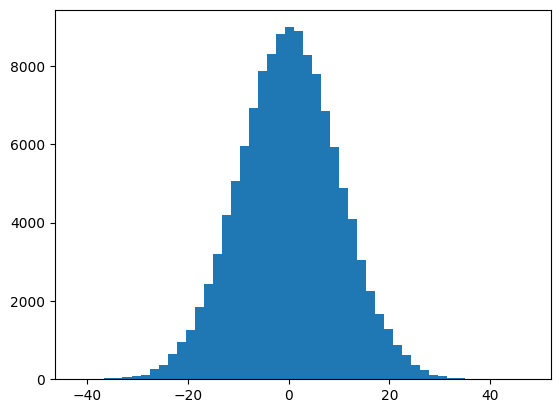

desvio padrão = 10.068943576334252, erro = 0.0689435763342523
media = 0.00816793930686747, erro = 0.00816793930686747


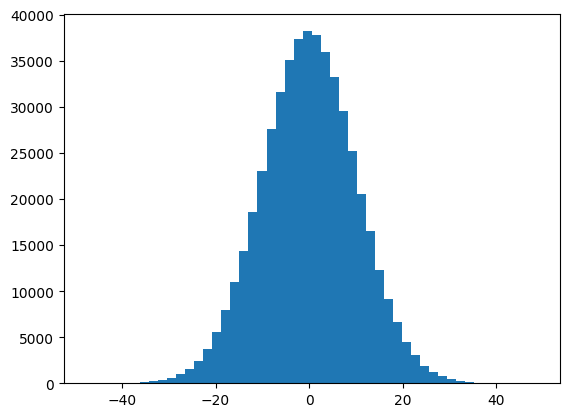

In [21]:
m = 100
ns = [100, 200, 500, 1000]

for n in ns:
    
    mx = matrix(m, n)
    #pega dos os produtos com o numpy, descarta os que não quer depois
    prod = mx.T @ mx
    indices = np.triu_indices(n, k=1)
    off_diagonal_products = prod[indices]
    
    plt.hist(off_diagonal_products, bins=50)
    #mostra a variancia e media
    print(f"desvio padrão = {np.std(off_diagonal_products)}, erro = {np.abs(np.std(off_diagonal_products) - 10)}")
    print(f"media = {np.mean(off_diagonal_products)}, erro = {np.abs(np.mean(off_diagonal_products))}")
    plt.show()           

de novo, apresenta um comportamento normal, que se evidencia mais com o crescimento de M. Além de deixar a curva ainda mais facil de se observar, a curva se estreita, e menos dados são observados nas caudas. Como discutido anteriormente, $\mu \approx \sqrt{n}$, $\sigma \approx 0$ o codigo acima indica valores ligeiramente diferentes do esperado. Se espera que com $x \to \inf$, A curva normal fica ainda mais evidente, e os parametros tendam ao téorico $\mu \to 10$, $\sigma \to 0$

10.00529566791252, erro = 0.00529566791252023
-0.019298466976564684, erro = 0.019298466976564684


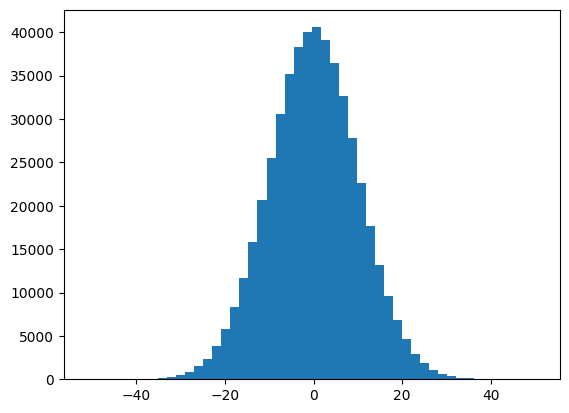

In [20]:
mx = matrix(m=100, n=30000) #maior que isso deu pau na maquina
prod = mx.T @ mx
indices = np.triu_indices(n, k=1)
off_diagonal_products = prod[indices]

plt.hist(off_diagonal_products, bins=50)
np.std(off_diagonal_products)
print(f"{np.std(off_diagonal_products)}, erro = {np.abs(np.std(off_diagonal_products) - 10)}")
print(f"{np.mean(off_diagonal_products)}, erro = {np.abs(np.mean(off_diagonal_products))}")
plt.show()

Com $m$ na escala de $10^5$, o erro comparado com o esperado $N(0,10^2)$ diminui ainda mais, se espera que com valores ainda menores o erro $\to 0$